<a href="https://colab.research.google.com/github/NervOUs11/Predict_S-P500/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Load train data
sp500 = yf.Ticker('^GSPC')

interval = '1d'
start = '1927-01-01'
end = '2000-01-01'

train_data = sp500.history(interval=interval, start=start, end=end)

# Show
train_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
1999-12-27 00:00:00-05:00,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0.0,0.0
1999-12-28 00:00:00-05:00,1457.089966,1462.680054,1452.780029,1457.660034,655400000,0.0,0.0
1999-12-29 00:00:00-05:00,1457.660034,1467.469971,1457.660034,1463.459961,567860000,0.0,0.0


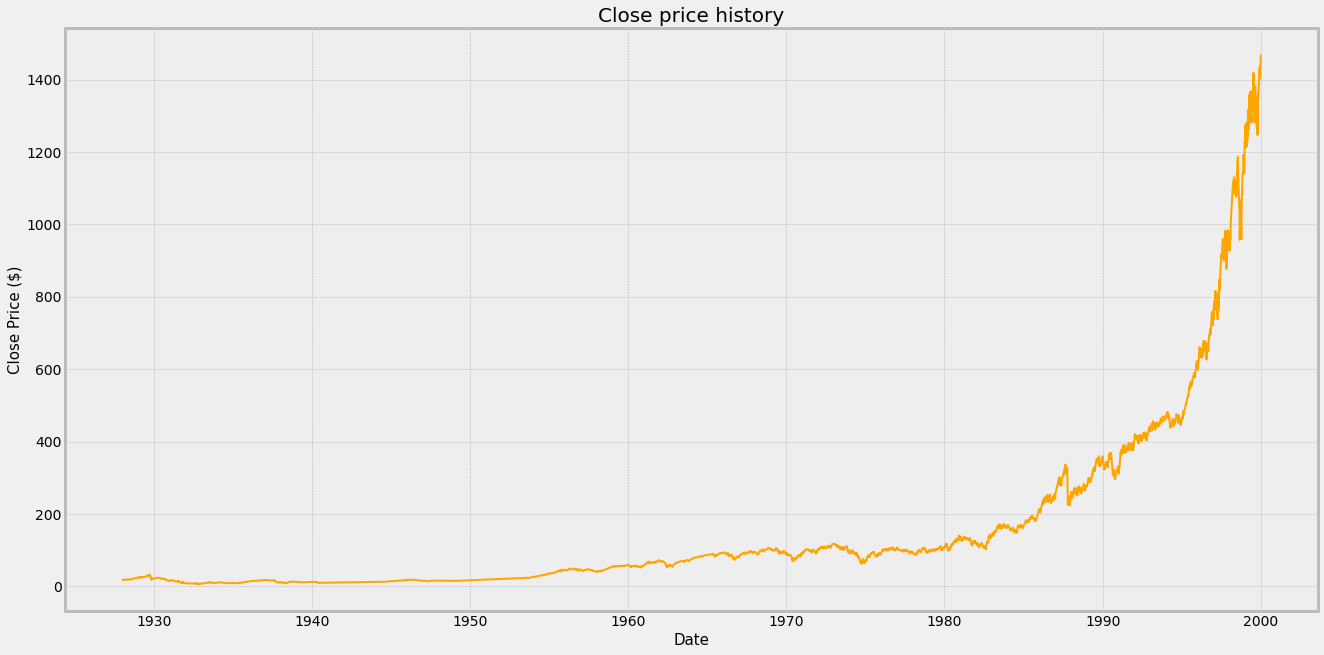

In [ ]:
# Show the close price
plt.figure(figsize=(20,10))
plt.style.use('bmh')
plt.title('Close price history',fontsize=20)
plt.plot(train_data['Close'], color='orange')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [ ]:
# Prepare data set

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
new_train_data = scaler.fit_transform(train_data['Close'].values.reshape(-1,1))

new_train_data

array([[0.00905212],
       [0.00912039],
       [0.00909308],
       ...,
       [0.99604735],
       [0.99673685],
       [1.        ]])

In [ ]:
new_train_data.shape

(18078, 1)

In [ ]:
days = 45
x_train, y_train = [], []

for i in range(days, len(new_train_data)):
  x_train.append(new_train_data[i-days:i])
  y_train.append(new_train_data[i])

In [ ]:
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_train.shape

(18033, 45, 1)

In [ ]:
y_train.shape

(18033, 1)

In [ ]:
# Create model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32))
model.add(Dense(1))

In [ ]:
# Complie model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
451/451 [==============================] - 66s 104ms/step - loss: 2.5818e-05 - val_loss: 0.0011
Epoch 2/5
451/451 [==============================] - 45s 99ms/step - loss: 2.7925e-06 - val_loss: 0.0017
Epoch 3/5
451/451 [==============================] - 45s 99ms/step - loss: 2.3741e-06 - val_loss: 5.5202e-04
Epoch 4/5
451/451 [==============================] - 44s 97ms/step - loss: 2.5215e-06 - val_loss: 0.0010
Epoch 5/5
451/451 [==============================] - 44s 97ms/step - loss: 2.0488e-06 - val_loss: 8.9873e-04


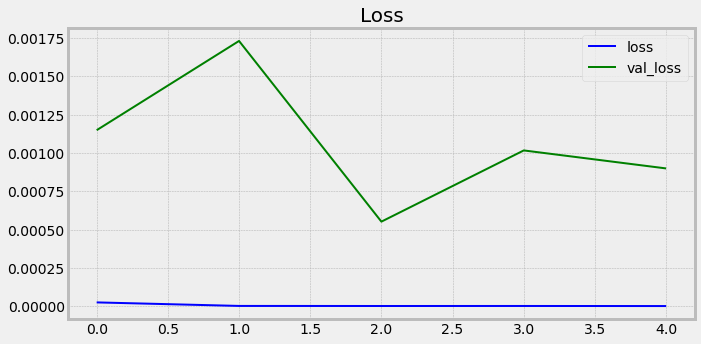

In [ ]:
# Show loss
plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.title('Loss',fontsize=20)
plt.plot(model.history.history['loss'], color='blue')
plt.plot(model.history.history['val_loss'], color='green')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
# Save model
model.save('my_model.h5')

In [ ]:
# Load model
model = load_model('my_model.h5')

In [30]:
# Load test data
sp500 = yf.Ticker('^GSPC')

interval = '1d'
start = '2000-01-01'
end = dt.datetime.now()

test_data = sp500.history(interval=interval, start=start, end=end)
real_prices = test_data['Close'].values

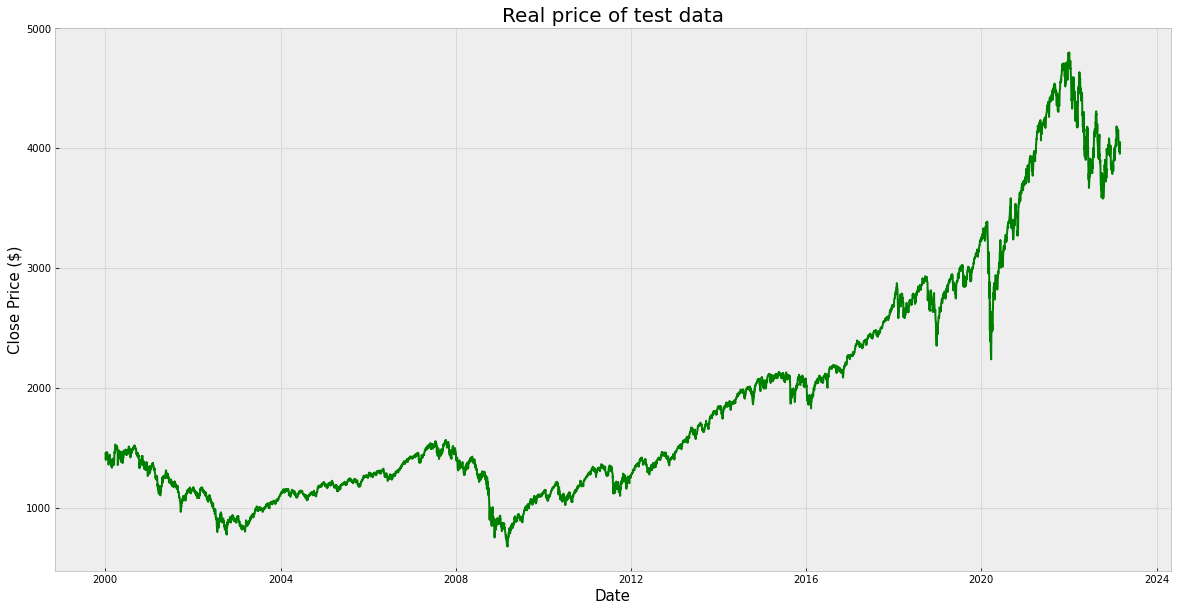

In [ ]:
# Show real price of test data
plt.figure(figsize=(20,10))
plt.style.use('bmh')
plt.title('Real price of test data',fontsize=20)
plt.plot(test_data['Close'], color='green')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [ ]:
# Merge all data from 1927-01-01 to now
all_data = pd.concat((train_data['Close'],test_data['Close']))

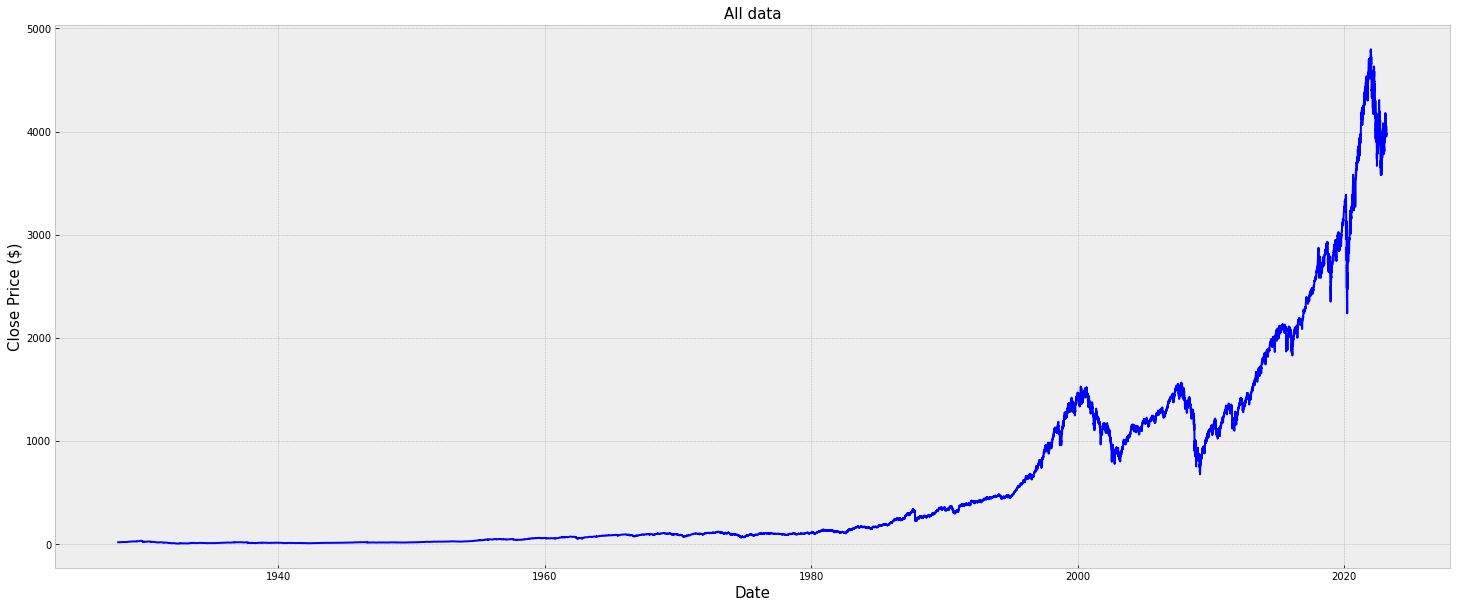

In [ ]:
# Show all data from 1927-01-01 to now
plt.figure(figsize=(25,10))
plt.title('All data',fontsize=15)
plt.style.use('bmh')
plt.plot(all_data, color='blue')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [27]:
# Set model's input 
model_input = all_data[len(all_data) - len(test_data) - days:].values
model_input = model_input.reshape(-1, 1)
model_input = scaler.fit_transform(model_input)

In [29]:
x_test = []

for i in range(days, len(model_input)):
  x_test.append(model_input[i-days:i])

#Convert to numpy array
x_test = np.array(x_test)

#Predict
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

183/183 [==============================] - 10s 28ms/step


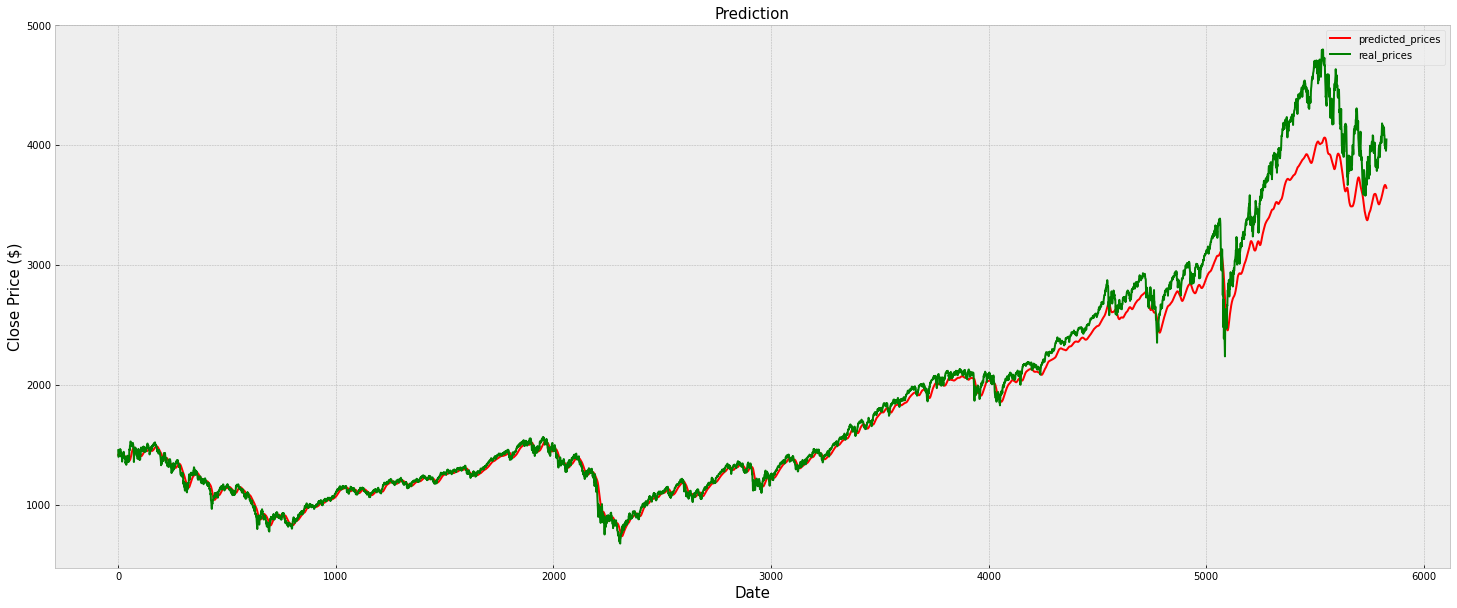

In [32]:
# Show result
plt.figure(figsize=(25,10))
plt.title('Prediction',fontsize=15)
plt.style.use('bmh')
plt.plot(predicted_prices, color='red')
plt.plot(real_prices, color='green')
plt.legend(['predicted_prices', 'real_prices'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()